

# Project: Investigate No Show Medical APPOINTMENTS Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
    <ul>    <li><a href="#gathering">Gathering</a></li>    </ul>
    <ul>    <li><a href="#assessing">Assessing</a></li>    </ul>
    <ul><ul>    <li><a href="#assReport">Assessment Summary</a></li>    </ul></ul>
    <ul>    <li><a href="#cleaning">Cleaning</a></li>    </ul>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I've decided to make my project on **No SHOW APPOINTMENTS** dataset. This data have info related to patients who some of them missed their scheduled appointments and I'll investigate it next to try figure out **what're the main factors affecting these cases and whether it can be predicted.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

<a id='gathering'></a>
### Gathering phase

In [44]:
df = pd.read_csv('noshowappointments.csv')


<a id='assessing'></a>
### Assessing phase

In [45]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [58]:
df.info()
# the columns names are messed up and needs to be all lower letters have consistent form
# the scheduled and appointment day columns have wrong data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [59]:
df.isnull().sum().sum()
# no missing data

0

In [60]:
df.duplicated().sum()
#no duplicated rows

0

In [61]:
df.PatientId.duplicated().sum()
# it's normal since a patient would visit a doctor more than once at most cases

48228

In [62]:
df.AppointmentID.duplicated().sum()

0

In [63]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [64]:
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [65]:
df.Neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

In [66]:
df.Handcap.value_counts()
# the handcap here is indicated by numbers, 0(no handicap) and 1(handcap) but 2~4 are supposed to indicate 
# a more serious handcap but it's not clear in the data

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [67]:
df.AppointmentDay.value_counts()
# apparently not all appointments in the same hospital or neighbourhood 

2016-06-06T00:00:00Z    4692
2016-05-16T00:00:00Z    4613
2016-05-09T00:00:00Z    4520
2016-05-30T00:00:00Z    4514
2016-06-08T00:00:00Z    4479
2016-05-11T00:00:00Z    4474
2016-06-01T00:00:00Z    4464
2016-06-07T00:00:00Z    4416
2016-05-12T00:00:00Z    4394
2016-05-02T00:00:00Z    4376
2016-05-18T00:00:00Z    4373
2016-05-17T00:00:00Z    4372
2016-06-02T00:00:00Z    4310
2016-05-10T00:00:00Z    4308
2016-05-31T00:00:00Z    4279
2016-05-05T00:00:00Z    4273
2016-05-19T00:00:00Z    4270
2016-05-03T00:00:00Z    4256
2016-05-04T00:00:00Z    4168
2016-06-03T00:00:00Z    4090
2016-05-24T00:00:00Z    4009
2016-05-13T00:00:00Z    3987
2016-05-25T00:00:00Z    3909
2016-05-06T00:00:00Z    3879
2016-05-20T00:00:00Z    3828
2016-04-29T00:00:00Z    3235
2016-05-14T00:00:00Z      39
Name: AppointmentDay, dtype: int64

In [68]:
df.Age.describe()
# here we have outliers and wrong inputs (since min is -1)

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [69]:
df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [70]:
df.query('Age > 100')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
58014,9.762948e+14,5651757,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
90372,2.342836e+11,5751563,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,0,0,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


<a id='assReport'></a>
## Assessing output

> - Columns names needs to be modified for easier work(lower letters and '_' instead of '-' )

> - The 'scheduled' and 'appointment' day columns have wrong data types

> - The 'patient Id' and 'appointment Id' won't be needed in my analysis

> - will only keep 'Handcap' values which are 0 and 1 , the rest will be deleted

> - The Age outliers such that of (-1) will be deleted

> - The columns (Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received) are answered in Binary and 0 means 'no' and 1 means 'yes'. I might need to modify them according to my analysis
       
> - The 'NoShow' column is a bit confusing and I will modify it to make more sense, since here 'NO' means that the person showed up and 'YES' means he didn't show up       
      



**please note that I might not clean all the issues in this dataset depending on what i would need in my analysis**


<a id='cleaning'></a>
### Cleaning phase

In [356]:
# first step is to get a copy of each dataset
df_clean = df.copy()

#### Define
> -  Columns names needs to be modified for easier work(lower letters and '_' instead of '-' )

#### Code

In [357]:
df_clean.rename(columns = lambda x:x.lower(),inplace = True)

In [358]:
df_clean.rename(columns = {'no-show':'no_show'}, inplace= True)

#### Test

In [359]:
df_clean.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

#### Define
> - The 'scheduled' and 'appointment' day columns have wrong data types

#### Code

In [360]:
df_clean.scheduledday = pd.to_datetime(df_clean.scheduledday)

In [361]:
df_clean.appointmentday = pd.to_datetime(df_clean.appointmentday)

#### Test

In [362]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   patientid       110527 non-null  float64            
 1   appointmentid   110527 non-null  int64              
 2   gender          110527 non-null  object             
 3   scheduledday    110527 non-null  datetime64[ns, UTC]
 4   appointmentday  110527 non-null  datetime64[ns, UTC]
 5   age             110527 non-null  int64              
 6   neighbourhood   110527 non-null  object             
 7   scholarship     110527 non-null  int64              
 8   hipertension    110527 non-null  int64              
 9   diabetes        110527 non-null  int64              
 10  alcoholism      110527 non-null  int64              
 11  handcap         110527 non-null  int64              
 12  sms_received    110527 non-null  int64              
 13  no_show       

#### Define
> - The 'patient Id' and 'appointment Id' won't be needed in my analysis

#### Code

In [363]:
df_clean = df_clean.drop(columns=['appointmentid', 'patientid'])

#### Test

In [364]:
df_clean.columns

Index(['gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood',
       'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap',
       'sms_received', 'no_show'],
      dtype='object')

#### Define
> - will only keep 'Handcap' values which are 0 and 1 , the rest will be deleted

#### Code

In [365]:
df_clean = df_clean[df_clean.handcap != 2]
df_clean = df_clean[df_clean.handcap != 3]
df_clean = df_clean[df_clean.handcap != 4]

#### Test

In [366]:
df_clean.handcap.value_counts()

0    108286
1      2042
Name: handcap, dtype: int64

#### Define
> - The Age outliers such that of (-1) will be deleted

#### Code

In [367]:
df_clean = df_clean[df_clean.age != -1]

#### Test

In [368]:
df_clean.age.describe()

count    110327.000000
mean         37.070753
std          23.098052
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

#### Define
> - The 'NoShow' column is a bit confusing and I will modify it to make more sense, since here 'NO' means that the person showed up and 'YES' means he didn't show up. I will **change** column name as well

#### Code

In [369]:
df_clean.rename(columns = {'no_show':'attendance'},inplace = True)

In [370]:
df_clean.attendance = df_clean.attendance.replace('No','attended')
df_clean.attendance = df_clean.attendance.replace('Yes','absent')

#### Test

In [371]:
df_clean.attendance.value_counts()

attended    88049
absent      22278
Name: attendance, dtype: int64

#### Define
> - The columns (Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received) are answered in Binary and 0 means 'no' and 1 means 'yes'.

#### Code

In [372]:
# we will change the binary value into more meaningful inputs,then we will change the data type
df_clean.scholarship = df_clean.scholarship.replace(0,'No')
df_clean.scholarship = df_clean.scholarship.replace(1,'yes')

df_clean.scholarship.astype('str');

In [373]:
df_clean.hipertension = df_clean.hipertension.replace(0,'No')
df_clean.hipertension = df_clean.hipertension.replace(1,'yes')

df_clean.hipertension.astype('str');

In [374]:
df_clean.diabetes = df_clean.diabetes.replace(0,'No')
df_clean.diabetes = df_clean.diabetes.replace(1,'Yes')

df_clean.diabetes.astype('str');

In [375]:
df_clean.alcoholism = df_clean.alcoholism.replace(0,'No')
df_clean.alcoholism = df_clean.alcoholism.replace(1,'Yes')

df_clean.alcoholism.astype('str');

In [376]:
df_clean.handcap = df_clean.handcap.replace(0,'No')
df_clean.handcap = df_clean.handcap.replace(1,'Yes')

df_clean.handcap.astype('str');

In [377]:
df_clean.sms_received = df_clean.sms_received.replace(0,'No')
df_clean.sms_received = df_clean.sms_received.replace(1,'Yes')

df_clean.sms_received.astype('str');

#### Test

In [378]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   gender          110327 non-null  object             
 1   scheduledday    110327 non-null  datetime64[ns, UTC]
 2   appointmentday  110327 non-null  datetime64[ns, UTC]
 3   age             110327 non-null  int64              
 4   neighbourhood   110327 non-null  object             
 5   scholarship     110327 non-null  object             
 6   hipertension    110327 non-null  object             
 7   diabetes        110327 non-null  object             
 8   alcoholism      110327 non-null  object             
 9   handcap         110327 non-null  object             
 10  sms_received    110327 non-null  object             
 11  attendance      110327 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(1), object(9)
memory usage: 10.9+ MB


<a id='eda'></a>
## Exploratory Data Analysis


> - What factors **might be** affecting patients showing up to appointment or missing it ?

> I'll define two functions which i will use mostly to explore my data, to reduce repetitive blocks of codes

In [407]:
def bar_chart(df,col):
    """
    this function is for drawing a bar chart to reduce repetitive code.
    """
    df[col].value_counts().plot(kind='bar', figsize=(10,4))
    plt.title(f'{col} Distribution'.title(), weight= 'bold')
    plt.xlabel(f'{col} (Y/N)', weight= 'bold')
    plt.ylabel('value_counts', weight= 'bold')
    


In [424]:
def pie_chart(df, col):
    """
    this function is for drawing a pie chart to reduce repetitive code .
    """
    df[col].value_counts().plot(kind= 'pie',figsize=(14,8),
                                 autopct='%1.1f%%',textprops={'fontsize': 14, 'weight': 'bold'});
    plt.title(f'{col} Distribution'.title(), fontsize= 16, weight = 'bold')
    plt.ylabel('')
    plt.axis ('equal')

>  I'll now investigate some variables by their own

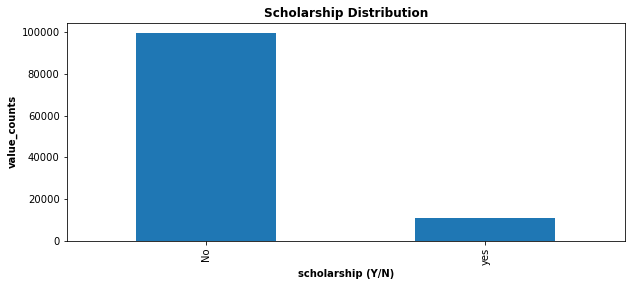

In [427]:
bar_chart(df_clean,'scholarship')

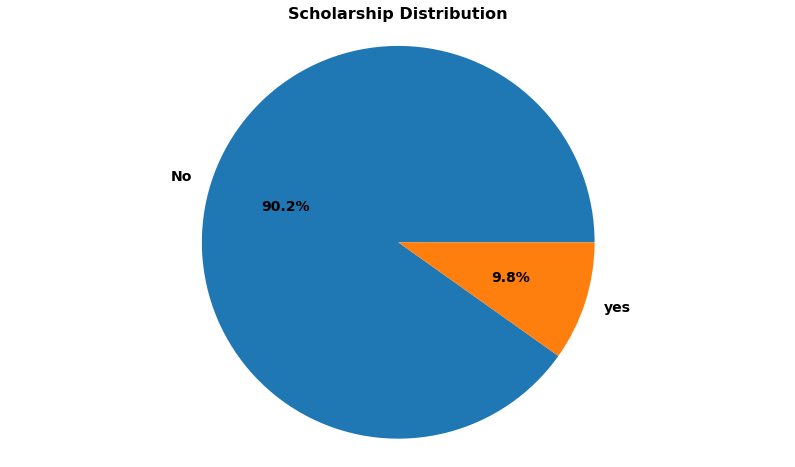

In [428]:
pie_chart(df_clean,'scholarship')

> - looks clear that the majority(90%) of our patients are outside the scholarship program

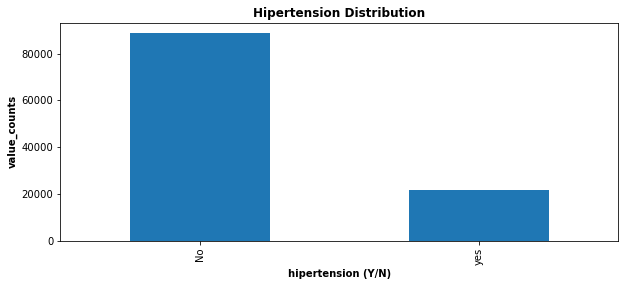

In [429]:
bar_chart(df_clean,'hipertension')

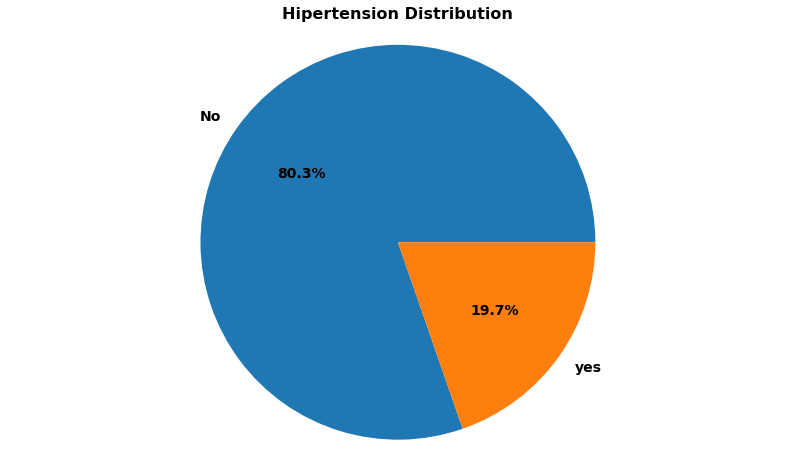

In [430]:
pie_chart(df_clean,'hipertension')

> - only 20% of our patients suffer from Hipertension

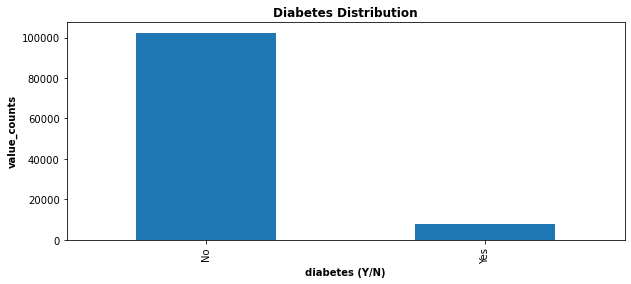

In [432]:
bar_chart(df_clean,'diabetes')

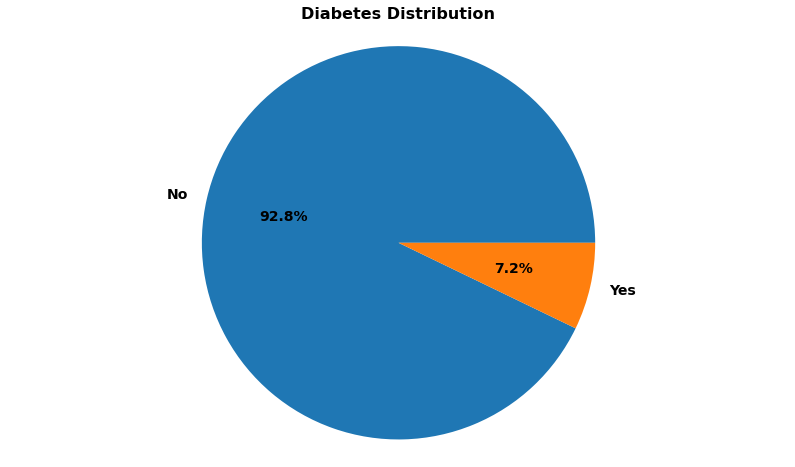

In [433]:
pie_chart(df_clean,'diabetes')

> - only 7% of our patients suffer from Diabetes

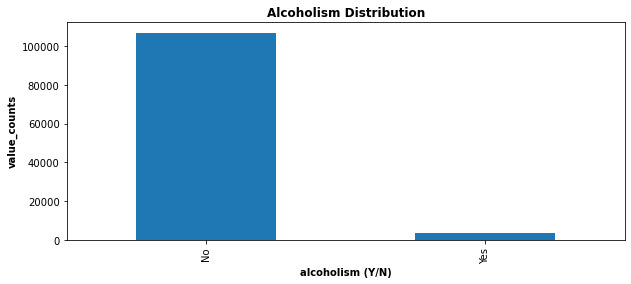

In [434]:
bar_chart(df_clean,'alcoholism')

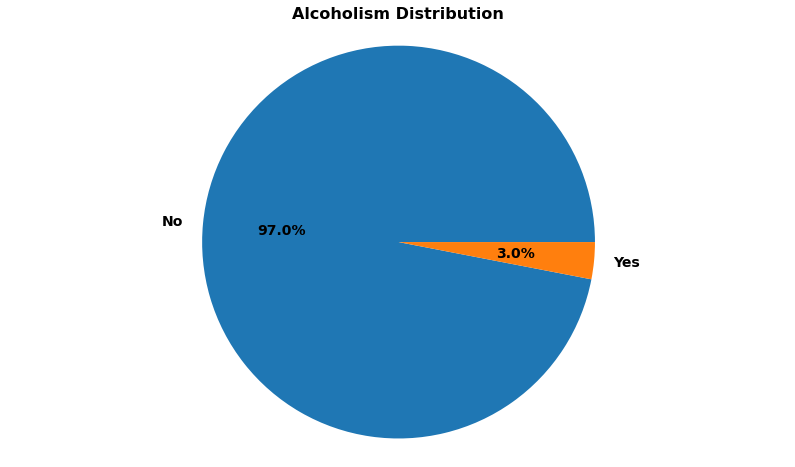

In [435]:
pie_chart(df_clean,'alcoholism')

> - only 3% of our patients are alcoholic

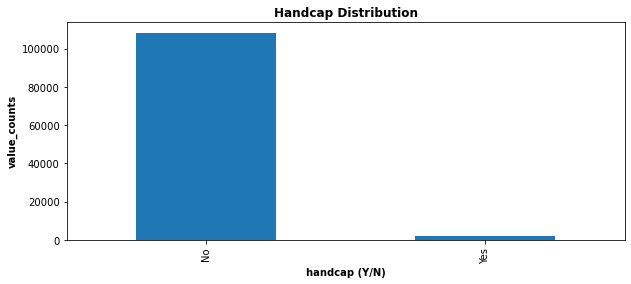

In [436]:
bar_chart(df_clean,'handcap')

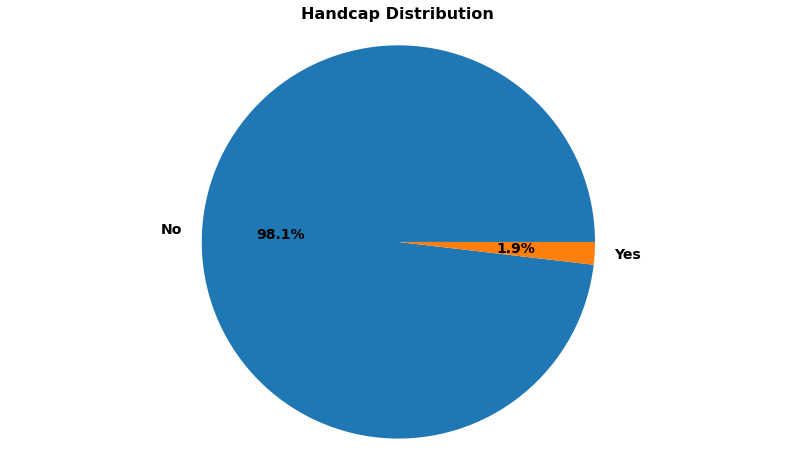

In [438]:
pie_chart(df_clean,'handcap')

> - if you remember that I have removed the ambiguous values sush as (2,3,4) and I made my dataset either healthy(NO) or handcap(Yes)

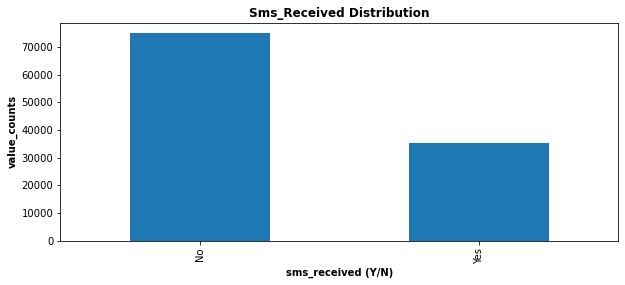

In [439]:
bar_chart(df_clean,'sms_received')

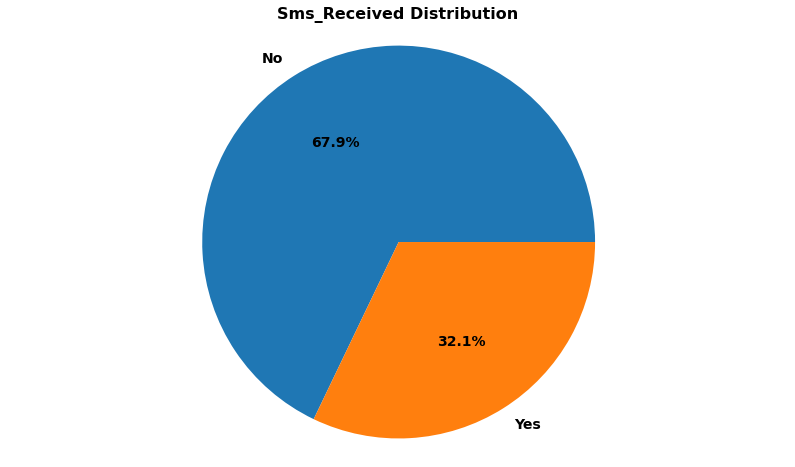

In [440]:
pie_chart(df_clean,'sms_received')

> - only 32% have received a confirmation SMS

### Now we will have a look on the (NO Show/ ATTENDANCE ) column to see how many didn't show up for appointment

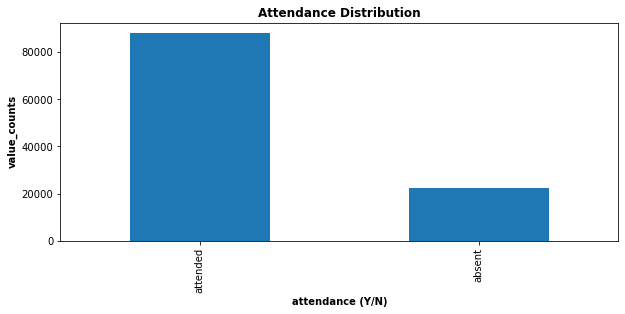

In [441]:
bar_chart(df_clean, 'attendance')

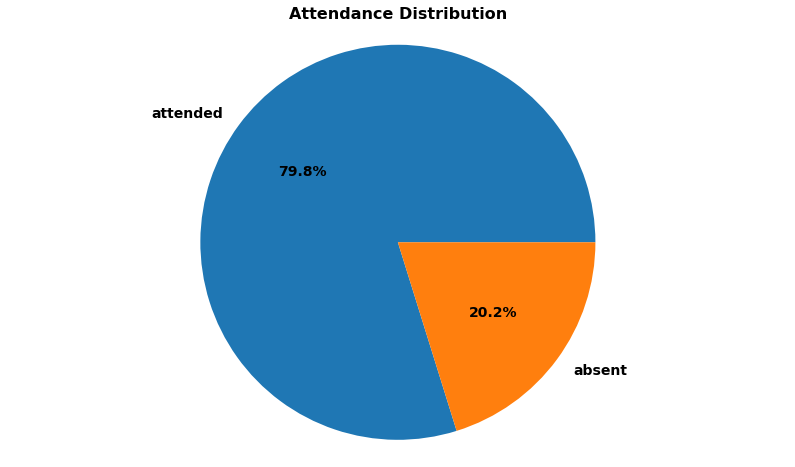

In [442]:
pie_chart(df_clean, 'attendance')

> - 20% of our appointments were missed 

### Now I will check the age distribution 

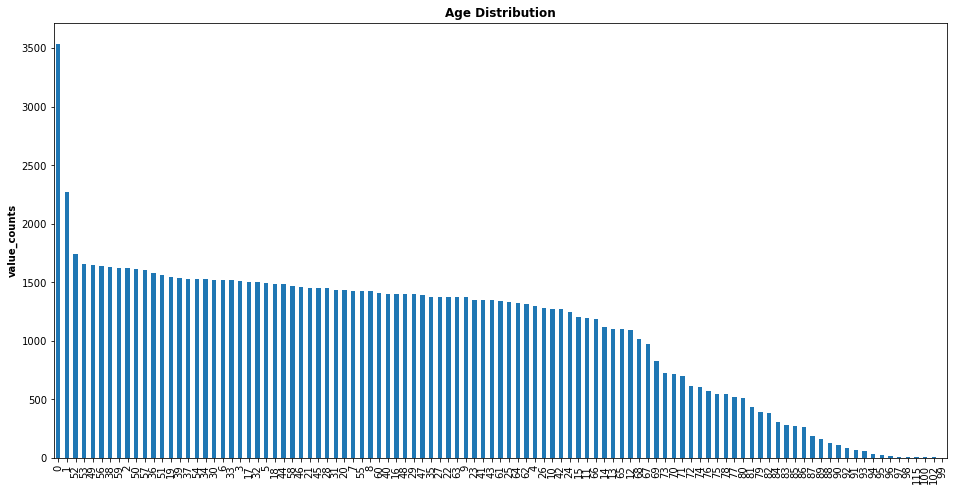

In [449]:
df_clean.age.value_counts().plot(kind='bar', figsize=(16,8))
plt.title('Age Distribution', weight = 'bold')
plt.ylabel('value_counts', weight = 'bold');

> - we have around 3500 patient who have 0 years old, which means that they are new born babies or less than 1 years old
> - The data is skewed
> - will explore my age data more
    


### I will start merging multiple variable with eachother and see what can I find 

In [459]:
# There are many age classifications but  i chose this one (baby,child,teen,adult,old adult) to use for my analysis

df_baby = df_clean.query('age <= 2')
df_child = df_clean.query('age <=12 & age >2')
df_teen = df_clean.query('age >12 & age <=18')
df_adult = df_clean.query('age > 18 & age <=59')
df_old_adult = df_clean.query('age > 60')

> Was Age an affecting factor for missing the appointment ?

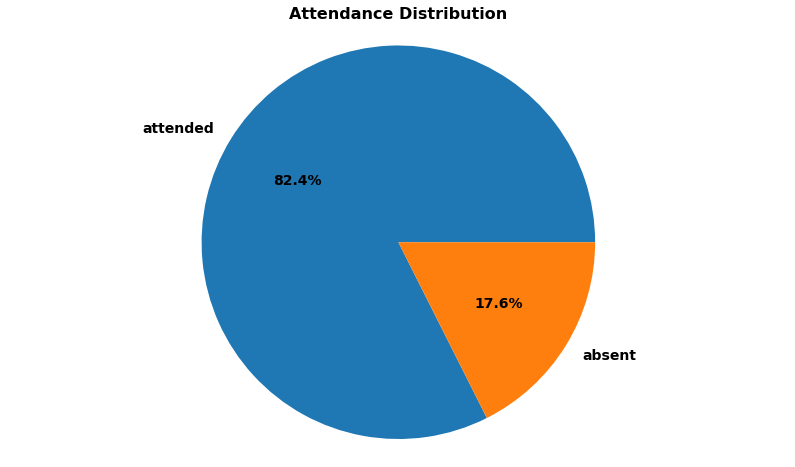

In [460]:
pie_chart(df_baby,'attendance')

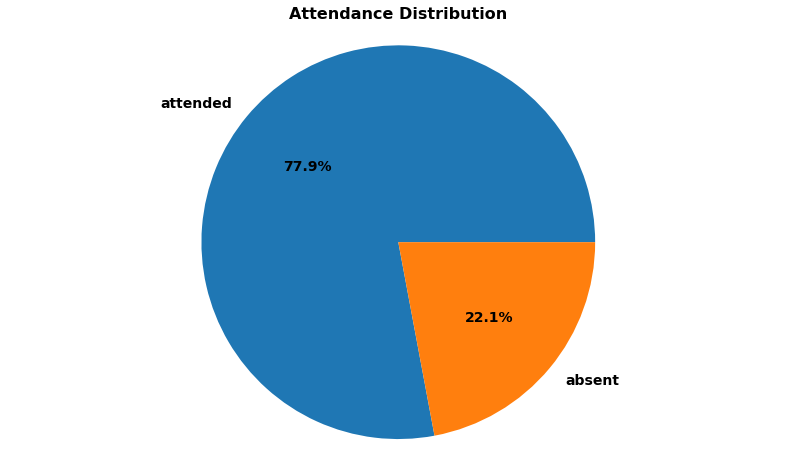

In [461]:
pie_chart(df_child,'attendance')

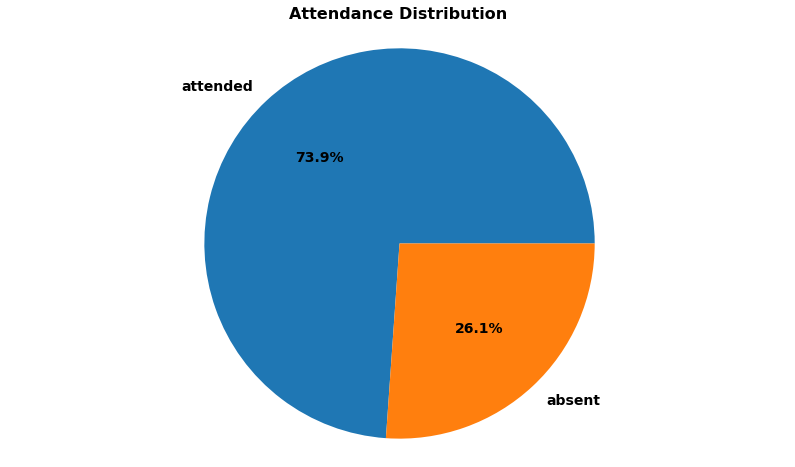

In [462]:
pie_chart(df_teen,'attendance')

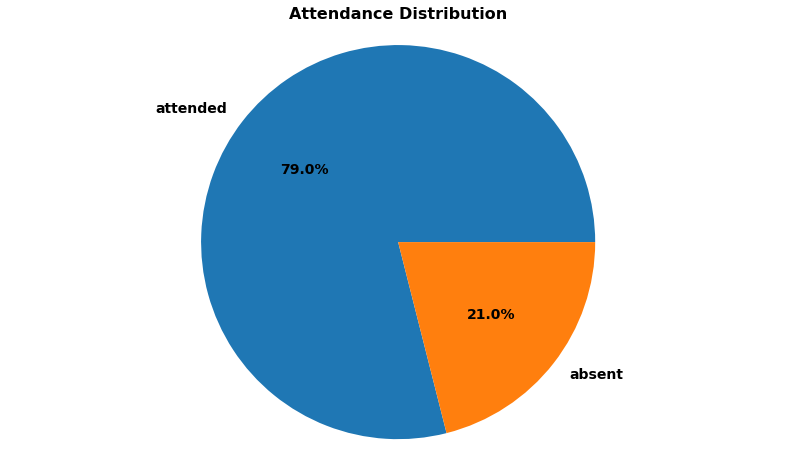

In [463]:
pie_chart(df_adult,'attendance')

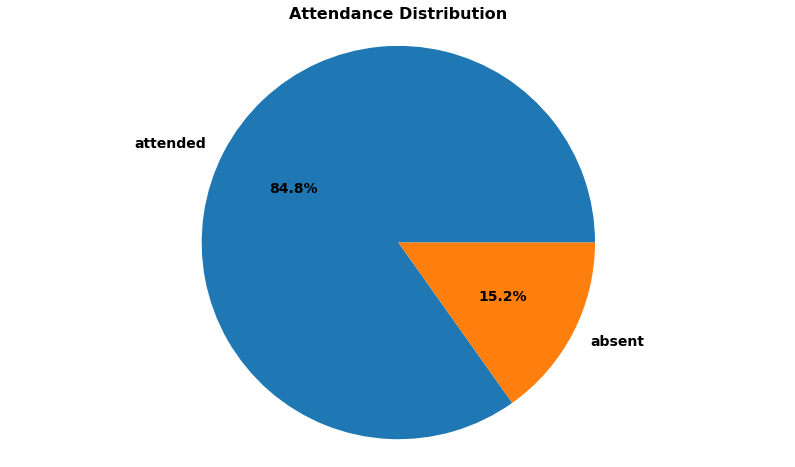

In [464]:
pie_chart(df_old_adult,'attendance')

> - we can't for sure say that age has an effect on missing the appointment, but still the **least** percent of missing appointments is ammont old adults (> 60) and the **highest** percentage is among teens (13-18)

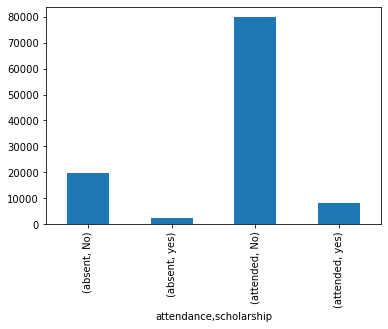

In [478]:
df_clean.groupby('attendance')['scholarship'].value_counts().plot(kind='bar');

> - here we saw how many which were absent or attended their appointments had scholarship (yes) or not (no)
> - most patients who were absent didn't have scholarship

### i'll divide the patient into healthy and ill
> **Healthy** patients won't have anything from (hipertension,diabetes,alcoholism,handcap)
>
> **Ill** patients will have atleast one of them

In [491]:
df_healthy = df_clean.query("hipertension == 'No' & diabetes == 'No' & alcoholism == 'No' & handcap == 'No'")

In [492]:
df_ill = df_clean.query("hipertension == 'yes' | diabetes == 'Yes' | alcoholism == 'Yes' | handcap == 'Yes'")

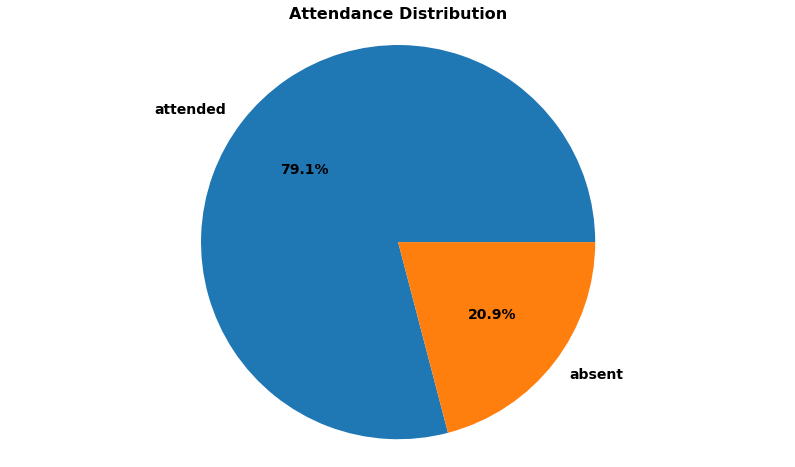

In [493]:
pie_chart(df_healthy,'attendance')

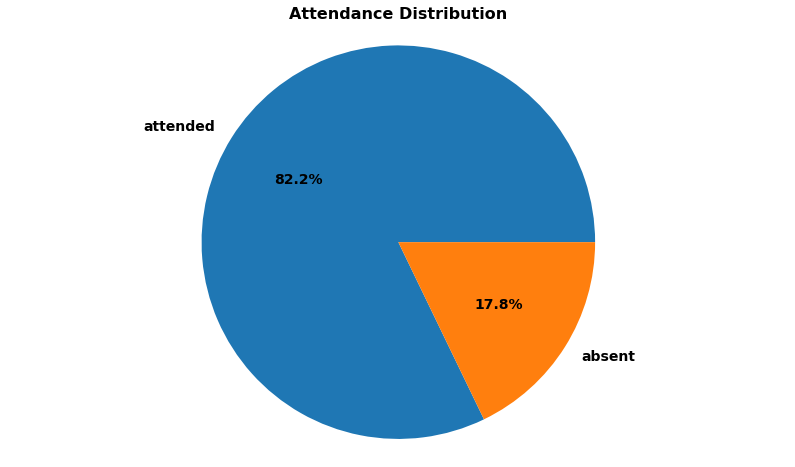

In [494]:
pie_chart(df_ill,'attendance')

> - from the charts we can tell that healthy people are more likely to miss their appointments, but since the pertanges are close we can't be so sure about our findings

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

> My analysis is consisting of:

> **introduction**

> - we loaded our main libraries we're going to use
> - we set our main **question**or this dataset (**what are the factors/variables that might be affecting the attendance level**)


> **Data wrangling**

> - Gathering Phase
> > - we loaded our data from csv file into our dataframe
> - assessing phase
> > - we checked our data programmatically and visually for any issues
> - cleaning phases
> > - we cleaned some of the issues we found depending on my needds for my analysis



> **EDA**
> - we used visualizations to check some of factors and variables affecting the attendance level of patients' appointments
> - We checked some variables by their own and found that:
> > - 20 % of all our appointments were missed
> > - majority of patients are outside the scholarship program
> > - Only 20 % of patients suffer from hipertension
> > - Only 7 % of patients suffer from Diabetes
> > - Only 3 % of patients are alcoholic
> > - Only 2 % of patients suffer from handcap
> > - Only 68% of patients have receiver SMS

> - Then we checked several variables together.
> - please note that
> > - **There no direct relatioship between each of them and the attendance level. we can't gurantee than one variable is hugely affecting their attendance and we had some limitations as well and we didn't do any statistical analysis**

> > - **We are limited to the info we have in our data and we of course not aware of other events/situations which would have a huge impact on their attendance**